<a href="https://colab.research.google.com/github/namiarescakirana/K-Means-Customers-Segmentationn/blob/main/Customers_Segmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Saving Mall_Customers.csv to Mall_Customers.csv
['.config', 'Mall_Customers.csv', 'sample_data']
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


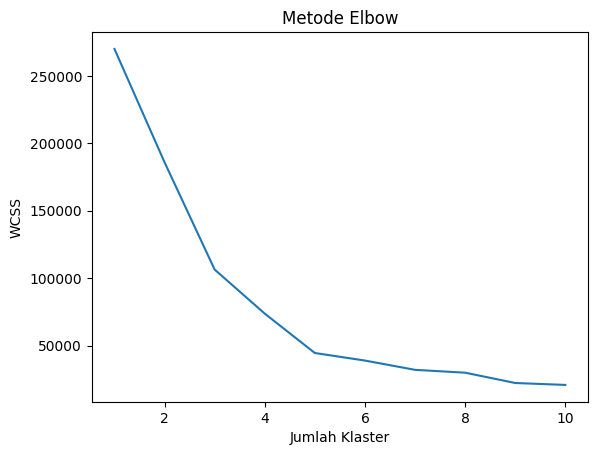

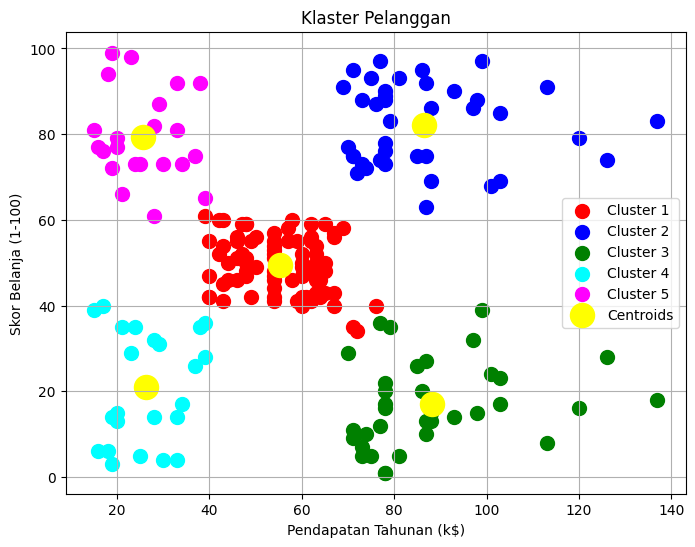

In [1]:
# Upload file dari lokal (file CSV)
from google.colab import files
uploaded = files.upload()

# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Cek file yang diunggah
import os
print(os.listdir())

# Baca dataset (pastikan nama file sesuai dengan yang diunggah)
dataset = pd.read_csv('Mall_Customers.csv')

# Exploratory Data Analysis
dataset.head(10)

# Total rows and columns in the dataset
dataset.shape

# Info dataset
dataset.info()

# Missing values check
dataset.isnull().sum()

# Feature selection: only 'Annual Income' and 'Spending Score'
X = dataset.iloc[:, [3, 4]].values

# === KMeans Clustering ===
from sklearn.cluster import KMeans
wcss = []

# Menggunakan metode Elbow untuk menentukan jumlah klaster optimal
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

# Visualisasi Elbow Method
plt.plot(range(1, 11), wcss)
plt.title('Metode Elbow')
plt.xlabel('Jumlah Klaster')
plt.ylabel('WCSS')
plt.show()

# Membuat model dengan jumlah klaster optimal (misalnya 5)
kmeans = KMeans(n_clusters=5, init='k-means++', random_state=0)
y_kmeans = kmeans.fit_predict(X)

# Visualisasi klaster
plt.figure(figsize=(8, 6))
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s=100, c='red', label='Cluster 1')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s=100, c='blue', label='Cluster 2')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s=100, c='green', label='Cluster 3')
plt.scatter(X[y_kmeans == 3, 0], X[y_kmeans == 3, 1], s=100, c='cyan', label='Cluster 4')
plt.scatter(X[y_kmeans == 4, 0], X[y_kmeans == 4, 1], s=100, c='magenta', label='Cluster 5')

# Pusat klaster
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1],
            s=300, c='yellow', label='Centroids')

plt.title('Klaster Pelanggan')
plt.xlabel('Pendapatan Tahunan (k$)')
plt.ylabel('Skor Belanja (1-100)')
plt.legend()
plt.grid(True)
plt.show()
